In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the penguins dataset

df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows of "Adelie" and "Chinstrap" classes
selected_classes = ["Adelie", "Chinstrap"]
df_filtered = df[df["species"].isin(selected_classes)].copy() # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column 
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered["class_encoded"] = y_encoded

# Display the filtered and encoded DataFrame
print(df_filtered[["species", "class_encoded"]])

# Split the data into features ( X ) and target variable ( y )
y = df_filtered['class_encoded'] # Target variable
X = df_filtered.drop([ 'species' , 'island' , 'sex' , 'class_encoded'] , axis =1)

       species  class_encoded
0       Adelie              0
1       Adelie              0
2       Adelie              0
4       Adelie              0
5       Adelie              0
..         ...            ...
215  Chinstrap              1
216  Chinstrap              1
217  Chinstrap              1
218  Chinstrap              1
219  Chinstrap              1

[214 rows x 2 columns]


2. To represent categorical values for "species" feature as a numerical value(int)

3. To delete the columns (columns are vertical and axis = 1) with the names "species", "island", "sex"

4. Our target variable is to find the species of a penguin. Penguins species is a biological factor therefore island is irrelevant. and also speceis does not depend on "sex" of each penguin. 

### Training Logistic Regression Model

In [2]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)


Accuracy: 0.5813953488372093
[[ 2.76781107e-03 -7.97317746e-05  4.87349842e-04 -2.87917459e-04]] [-8.33752921e-06]


/home/sasika/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


6. Splitting the datasets into train and test datasets is done in a random manner. If we run train_test_split() multiple times, we will get different parameters for the model. If we set random_state to an integer, it ensures the data reproducibility. 

7. SAGA (Stochastic Average Gradient Augmented) is better for very large datasets. 
Here, a not very large dataset was used. and dataset is also not sparse.


In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model. Here we are using saga solver to learn weights.
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 1.0
[[ 1.61343629 -1.46657503 -0.15152366 -0.00398477]] [-0.08866934]


8. Classification accuracy using "liblinear" solver is 1.0

9. liblinear tends to outperform SAGA on smaller datasets due to its efficient handling of fewer data points, leading to quicker convergence. Both solvers support L1 regularization; however, liblinear's efficiency with this penalty in smaller datasets often gives it an edge in accuracy and speed over SAGA when the dataset does not require handling large-scale data or complex features

### After feature scaling

In [9]:
X.columns

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

NOTE : We should avoid _data leakage_. We should apply data scaling after splitting the dataset. Otherwise test dataset also affects the model behavior.

In [11]:
# After feature scaling
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with the scaled data
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.9767441860465116
[[ 3.9043901  -0.82353757  0.18544081 -0.73560268]] [-1.9672946]


In [12]:
# After feature scaling
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with the scaled data
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train_scaled, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)

Accuracy: 0.9767441860465116
[[ 3.77819685 -0.75341497  0.17248526 -0.71597049]] [-1.72205563]


10. After applying the standard scalar to the dataset, accuracy has been increased in "saga" solver. due to the reduced variance in feature values, which helps the solver focus on learning the underlying patterns rather than dealing with disparities in feature scales

In [49]:
# 11
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

# Load the penguins dataset
df = sns.load_dataset("penguins")
df.dropna(inplace=True)

# Filter rows for 'Adelie' and 'Chinstrap' classes
selected_classes = ['Adelie', 'Chinstrap']
df_filtered = df[df['species'].isin(selected_classes)].copy()  # Make a copy to avoid the warning

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the species column
y_encoded = le.fit_transform(df_filtered['species'])
df_filtered['class_encoded'] = y_encoded
df_filtered.head()


# Drop the 'sex' and 'island' columns
df_filtered.drop(['sex', 'island'], axis=1, inplace=True)

# Define the feature matrix and target variable
X = df_filtered.drop(['species', 'class_encoded'], axis=1)
y = df_filtered['class_encoded']  # Target variable
X.head()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg = LogisticRegression(solver='saga')
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(logreg.coef_, logreg.intercept_)


Accuracy: 0.5813953488372093
[[ 2.75480450e-03 -8.49502537e-05  4.31120465e-04 -2.84800249e-04]] [-8.65221132e-06]


/home/sasika/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


11. We should remove the features like `sex` and `island` which do not contribute in determining the penguin species.

12. Categorical values are non-numerical values. After we use label encoding, they become discrete values.Model might intrepret label encoded numbers as ordinal. It is not ideal to use Label Encoding becuase this will give non-integer values for each category resulting in distorted category values. (After applying a scaling method.) 

I propose to use one-hot encoding to encode categorical values. Since the values are [0,1] and we do not need to use scaling anyway.

---
## Question 2

In [22]:
# x1 - number of hours studied 
# x2 - undergrad GPA

# y whether the student recieved an A+ in the class  

w0, w1, w2 = -5.9, 0.06, 1.5 

In [23]:
# using logistic regression model to predict the probability of getting an A+ in the class
import math 

x1, x2 = 50, 3.6

z = w0 + w1*x1 + w2*x2
p = 1 / (1 + math.exp(-z))

print(p)

0.9241418199787566


Probability of getting an A+: 0.9241418199787566

In [24]:
# subject z 
p = 0.6
z = - math.log((1/p)- 1)

# subject x1 
x1 = (z - w0 - w2*x2) / w1

print("Number of hours the previous student should in order to have a 60% chance of getting an A+ in the class:", x1)

Number of hours the previous student should in order to have a 60% chance of getting an A+ in the class: 15.091085135136078


---
## 2 Logistic regression on real world data

Dataset link : https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

In [43]:
!pip install ucimlrepo

In [54]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
magic_gamma_telescope = fetch_ucirepo(id=159) 
  
# data (as pandas dataframes) 
X = magic_gamma_telescope.data.features 
y = magic_gamma_telescope.data.targets 
  
# metadata 
print(magic_gamma_telescope.metadata) 
  
# variable information 
print(magic_gamma_telescope.variables) 


{'uci_id': 159, 'name': 'MAGIC Gamma Telescope', 'repository_url': 'https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope', 'data_url': 'https://archive.ics.uci.edu/static/public/159/data.csv', 'abstract': 'Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 19020, 'num_features': 10, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2004, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C52C8B', 'creators': ['R. Bock'], 'intro_paper': None, 'additional_info': {'summary': "The data are MC generated (see below) to simulate registration of high energy gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the imaging technique. Cherenkov gamm

In [51]:
X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [67]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming 'y' is the original target column
# If 'y' is a DataFrame or Series, use ravel() or .values to flatten it to a 1D array
le = LabelEncoder()

# Encode the target variable (ensure y is 1D)
y_encoded = le.fit_transform(y.values.ravel())

# Convert to a DataFrame
y_encoded = pd.DataFrame(y_encoded, columns=['target'])

# Display the first few rows
print(y_encoded.head())


   target
0       0
1       0
2       0
3       0
4       0


In [68]:
y_encoded['target'].value_counts()

target
0    12332
1     6688
Name: count, dtype: int64

Correlation Matrix:
           fLength    fWidth     fSize     fConc    fConc1     fAsym  \
fLength   1.000000  0.770512  0.702454 -0.630999 -0.598145 -0.368556   
fWidth    0.770512  1.000000  0.717517 -0.609779 -0.581141 -0.266961   
fSize     0.702454  0.717517  1.000000 -0.850850 -0.808835 -0.159863   
fConc    -0.630999 -0.609779 -0.850850  1.000000  0.976412  0.112272   
fConc1   -0.598145 -0.581141 -0.808835  0.976412  1.000000  0.100159   
fAsym    -0.368556 -0.266961 -0.159863  0.112272  0.100159  1.000000   
fM3Long  -0.119747 -0.176234  0.095157 -0.121899 -0.118769  0.274045   
fM3Trans  0.013389  0.039744  0.015455 -0.011294 -0.010966  0.002553   
fAlpha   -0.008777  0.066061 -0.186675  0.235272  0.229799 -0.055689   
fDist     0.418466  0.336816  0.437041 -0.328332 -0.304625 -0.206730   
target    0.307572  0.265596  0.117795 -0.024615 -0.004797 -0.173587   

           fM3Long  fM3Trans    fAlpha     fDist    target  
fLength  -0.119747  0.013389 -0.008777  0.418466  0.30

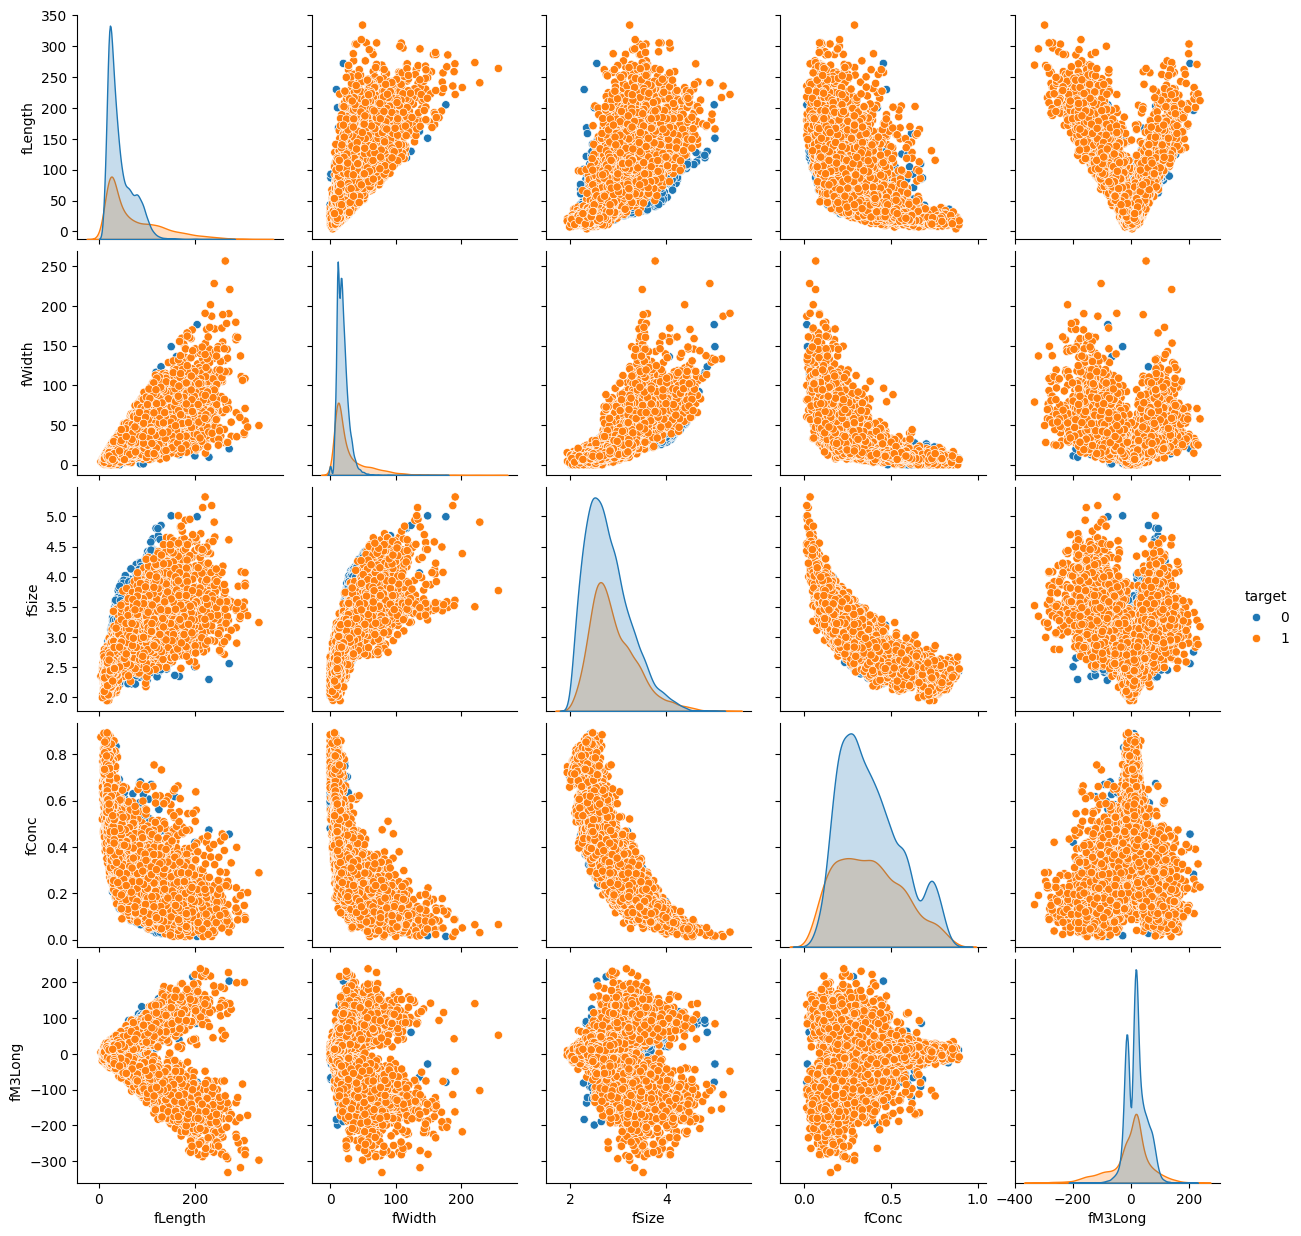

In [69]:
# Create a new DataFrame combining features and target for easier plotting
df = pd.concat([X, y_encoded], axis=1)

# Obtain the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Select up to 5 features for pairplot analysis
selected_features = ['fLength', 'fWidth', 'fSize', 'fConc', 'fM3Long']  # Example features

# Create a pairplot for selected features with the target as hue
sns.pairplot(df[selected_features + ['target']], hue='target', diag_kind='kde')

# Show the plot
plt.show()

In [70]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
magic_gamma_telescope = fetch_ucirepo(id=159)

# Features and target
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# Label encoding the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Initialize logistic regression model
logreg = LogisticRegression(solver='liblinear')  # Using liblinear solver for binary classification

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Detailed classification metrics (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7913
Confusion Matrix:
 [[2202  258]
 [ 536  808]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.90      0.85      2460
           1       0.76      0.60      0.67      1344

    accuracy                           0.79      3804
   macro avg       0.78      0.75      0.76      3804
weighted avg       0.79      0.79      0.78      3804



In [71]:
import statsmodels.api as sm
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from ucimlrepo import fetch_ucirepo

# Fetch dataset from UCI
magic_gamma_telescope = fetch_ucirepo(id=159)

# Features and target
X = magic_gamma_telescope.data.features
y = magic_gamma_telescope.data.targets

# Label encoding the target variable
le = LabelEncoder()
y_encoded = le.fit_transform(y.values.ravel())

# Add an intercept column to the dataset (statsmodels does not add it by default)
X = sm.add_constant(X)

# Fit the Logistic Regression model using statsmodels
logit_model = sm.Logit(y_encoded, X)
result = logit_model.fit()

# Print the summary which includes p-values, coefficients, and other statistics
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.457329
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                19020
Model:                          Logit   Df Residuals:                    19009
Method:                           MLE   Df Model:                           10
Date:                Wed, 02 Oct 2024   Pseudo R-squ.:                  0.2947
Time:                        10:18:13   Log-Likelihood:                -8698.4
converged:                       True   LL-Null:                       -12334.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5854      0.311    -21.200      0.000      -7.194      -5.977
fLength        0.0296      0.

---
## 3 Logistic regression First/Second-Order Methods

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Apply transformation
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)


In [29]:
weights = np.random.rand(X.shape[1])
weights.max()

0.6458941130666561

In [33]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Convert the target to binary (0 and 1)
y = (y == 1).astype(int)  # Assuming class 1 is the second class

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X for the intercept

# Initialize weights to random values between 0 and 1
weights = np.random.rand(X.shape[1])


# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Number of iterations and learning rate
iterations = 20
learning_rate = 0.01

# Batch Gradient Descent
for i in range(iterations):
    # Compute predictions
    z = np.dot(X, weights)
    predictions = sigmoid(z)

    # Compute the gradient
    gradient = np.dot(X.T, (predictions - y)) / y.size

    # Update weights
    weights -= learning_rate * gradient

    # Optional: Print the cost every 5 iterations
    if i % 5 == 0:
        cost = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
        print(f"Iteration {i}, Cost: {cost:.4f}")

# Final weights
print("Final weights:", weights)


Iteration 0, Cost: 0.3477
Iteration 5, Cost: 0.3431
Iteration 10, Cost: 0.3387
Iteration 15, Cost: 0.3344
Final weights: [0.52920476 0.76765048 0.62185422]


3.2 Random values between 0 and 1, If we initialize with zeros it might not learn (See the lecture slides)

3.3 Binary Cross Entropy Loss - Better for Binary Classification

Iteration 0, Cost: 0.3477
Iteration 5, Cost: 0.3431
Iteration 10, Cost: 0.3387
Iteration 15, Cost: 0.3344


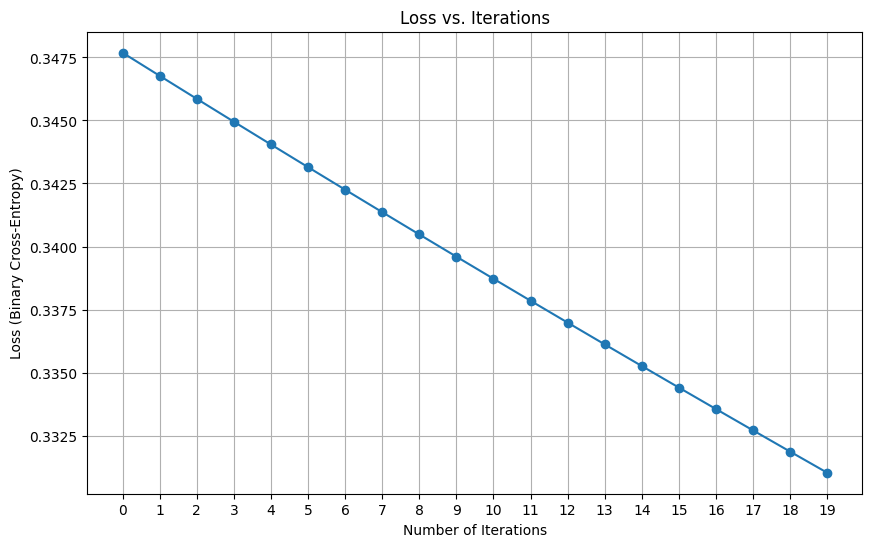

Final weights: [0.52920476 0.76765048 0.62185422]


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Convert the target to binary (0 and 1)
y = (y == 1).astype(int)  # Assuming class 1 is the second class

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X for the intercept

# Initialize weights to random values between 0 and 1
weights = np.random.rand(X.shape[1])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Number of iterations and learning rate
iterations = 20
learning_rate = 0.01

# List to store loss values
bgd_loss_values = []

# Batch Gradient Descent
for i in range(iterations):
    # Compute predictions
    z = np.dot(X, weights)
    predictions = sigmoid(z)

    # Compute the gradient
    gradient = np.dot(X.T, (predictions - y)) / y.size

    # Update weights
    weights -= learning_rate * gradient

    # Compute and store the cost
    cost = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    bgd_loss_values.append(cost)

    # Optional: Print the cost every 5 iterations
    if i % 5 == 0:
        print(f"Iteration {i}, Cost: {cost:.4f}")

# Plotting the loss with respect to the number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), bgd_loss_values, marker='o')
plt.title('Loss vs. Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid()
plt.xticks(range(iterations))
plt.show()

# Final weights
print("Final weights:", weights)


Iteration 1, Cost: 0.0574
Iteration 2, Cost: 0.0321
Iteration 3, Cost: 0.0225
Iteration 4, Cost: 0.0174
Iteration 5, Cost: 0.0143
Iteration 6, Cost: 0.0121
Iteration 7, Cost: 0.0106
Iteration 8, Cost: 0.0094
Iteration 9, Cost: 0.0084
Iteration 10, Cost: 0.0077
Iteration 11, Cost: 0.0070
Iteration 12, Cost: 0.0065
Iteration 13, Cost: 0.0060
Iteration 14, Cost: 0.0057
Iteration 15, Cost: 0.0053
Iteration 16, Cost: 0.0050
Iteration 17, Cost: 0.0048
Iteration 18, Cost: 0.0045
Iteration 19, Cost: 0.0043
Iteration 20, Cost: 0.0041


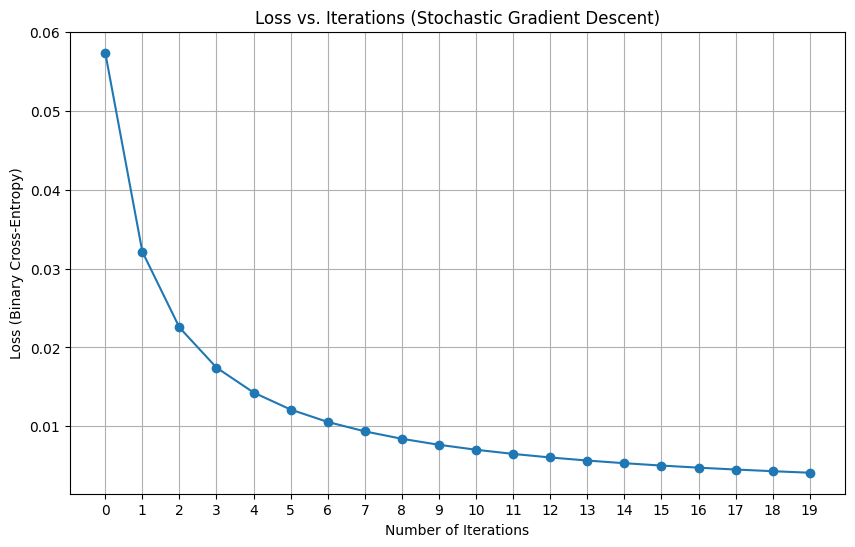

Final weights: [0.07867303 6.04857476 0.97039955]


In [41]:
# Using Stochastic Gradient Descent 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Convert the target to binary (0 and 1)
y = (y == 1).astype(int)  # Assuming class 1 is the second class

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X for the intercept

# Initialize weights to random values between 0 and 1
weights = np.random.rand(X.shape[1])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Number of iterations and learning rate
iterations = 20
learning_rate = 0.01

# List to store loss values
sgd_loss_values = []

# Stochastic Gradient Descent
for i in range(iterations):
    for j in range(X.shape[0]):  # Iterate over each sample
        # Compute prediction for the j-th sample
        z = np.dot(X[j], weights)
        prediction = sigmoid(z)

        # Compute the gradient for the j-th sample
        gradient = (prediction - y[j]) * X[j]

        # Update weights
        weights -= learning_rate * gradient

    # Compute and store the cost for the entire dataset after each epoch
    z_all = np.dot(X, weights)
    predictions_all = sigmoid(z_all)
    cost = -np.mean(y * np.log(predictions_all + 1e-15) + (1 - y) * np.log(1 - predictions_all + 1e-15))
    sgd_loss_values.append(cost)

    # Print the cost every iteration
    print(f"Iteration {i + 1}, Cost: {cost:.4f}")

# Plotting the loss with respect to the number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), sgd_loss_values, marker='o')
plt.title('Loss vs. Iterations (Stochastic Gradient Descent)')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid()
plt.xticks(range(iterations))
plt.show()

# Final weights
print("Final weights:", weights)

Iteration 1, Cost: 0.3477
Iteration 2, Cost: 0.0974
Iteration 3, Cost: 0.0361
Iteration 4, Cost: 0.0140
Iteration 5, Cost: 0.0056
Iteration 6, Cost: 0.0022
Iteration 7, Cost: 0.0009
Iteration 8, Cost: 0.0004
Iteration 9, Cost: 0.0002
Iteration 10, Cost: 0.0001
Iteration 11, Cost: 0.0000
Iteration 12, Cost: 0.0000
Iteration 13, Cost: 0.0000
Iteration 14, Cost: 0.0000
Iteration 15, Cost: 0.0000
Iteration 16, Cost: 0.0000
Iteration 17, Cost: 0.0000
Iteration 18, Cost: 0.0000
Iteration 19, Cost: 0.0000
Iteration 20, Cost: 0.0000


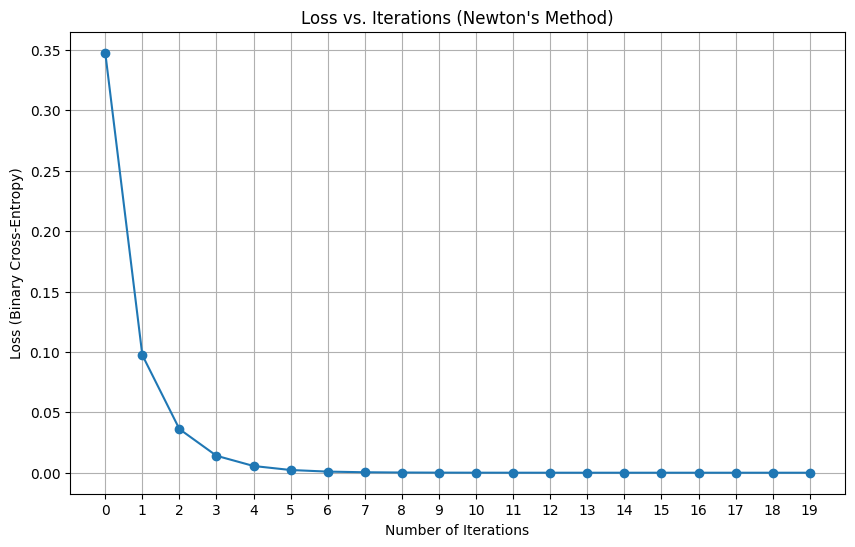

Final weights: [-1.97020104 38.88750492  1.74841846]


In [37]:
# Newton's Method
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Convert the target to binary (0 and 1)
y = (y == 1).astype(int)  # Assuming class 1 is the second class

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X for the intercept

# Initialize weights to random values between 0 and 1
weights = np.random.rand(X.shape[1])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Number of iterations
iterations = 20

# List to store loss values
newtons_method_loss_values = []

# Newton's Method
for i in range(iterations):
    # Compute predictions
    z = np.dot(X, weights)
    predictions = sigmoid(z)

    # Compute the gradient
    gradient = np.dot(X.T, (predictions - y)) / y.size

    # Compute the Hessian matrix
    W = np.diag(predictions * (1 - predictions))  # Diagonal matrix of the second derivatives
    H = np.dot(X.T, np.dot(W, X)) / y.size  # Hessian

    # Update weights using the Newton's method formula
    weights -= np.linalg.inv(H).dot(gradient)

    # Compute and store the cost for the entire dataset after each iteration
    cost = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    newtons_method_loss_values.append(cost)

    # Print the cost for every iteration
    print(f"Iteration {i + 1}, Cost: {cost:.4f}")

# Plotting the loss with respect to the number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), newtons_method_loss_values, marker='o')
plt.title("Loss vs. Iterations (Newton's Method)")
plt.xlabel("Number of Iterations")
plt.ylabel("Loss (Binary Cross-Entropy)")
plt.grid()
plt.xticks(range(iterations))
plt.show()

# Final weights
print("Final weights:", weights)

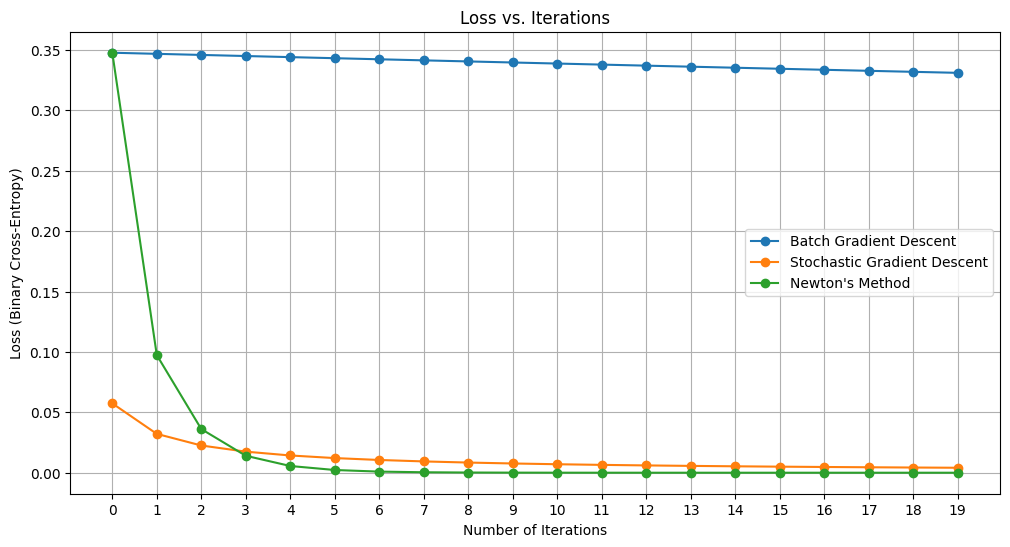

In [40]:
bgd_loss_values
sgd_loss_values
newtons_method_loss_values

# Plotting the loss values for all three methods
plt.figure(figsize=(12, 6))
plt.plot(range(iterations), bgd_loss_values, label='Batch Gradient Descent', marker='o')
plt.plot(range(iterations), sgd_loss_values, label='Stochastic Gradient Descent', marker='o')
plt.plot(range(iterations), newtons_method_loss_values, label="Newton's Method", marker='o')
plt.title('Loss vs. Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid()
plt.legend()
plt.xticks(range(iterations))
plt.show()


3.8 Stochastic Gradient Descent methodhas converged to the oprimum value with minimum bumber of iteartons. With the same loss value Batch Gradient Descent and Stochastic Gradient Descent has started working, Howvert with a very steep gradient, SGD has converged to minimum loss with minimum number of iterations. BGD shows a linear reduction in loss with each iteartion. 


### 1. Gradient Descent

#### a. Early Stopping
- **Approach**: Monitor the loss (cost function) over iterations and stop training when the loss does not improve significantly over a set number of iterations (patience).
- **Implementation**:
  - Track the previous loss and compare it with the current loss.
  - If the change in loss is less than a defined threshold (e.g., 0.001) for a certain number of iterations (e.g., 10 iterations), stop the training.
- **Benefits**: 
  - Prevents overfitting by stopping the training when further iterations do not yield significant improvements.
  - Reduces computational resources by avoiding unnecessary iterations.

#### b. Fixed Number of Iterations with Validation
- **Approach**: Set a predetermined number of iterations based on empirical experiments or cross-validation.
- **Implementation**:
  - Use a validation set to observe how the model's performance (accuracy, F1 score, etc.) changes with varying numbers of iterations.
  - Choose the iteration count that yields the best validation performance.
- **Benefits**:
  - Provides a systematic way to tune the iteration count.
  - Helps balance training time and model performance.

### 2. Newton’s Method

#### a. Convergence Tolerance
- **Approach**: Define a convergence criterion based on the change in weights or the change in the cost function.
- **Implementation**:
  - Set a threshold for the maximum acceptable change in weights (e.g., 0.001) or cost (e.g., 0.0001).
  - Stop iterating when the change between consecutive iterations falls below the defined threshold.
- **Benefits**:
  - Ensures that the method stops when improvements become negligible.
  - Provides a clear stopping point based on the behavior of the optimization process.

#### b. Maximum Iterations with Backtracking
- **Approach**: Set a maximum number of iterations while also implementing backtracking line search to adjust the learning rate dynamically.
- **Implementation**:
  - Use a fixed number of iterations as a cap but adjust the step size based on how well the objective function improves in each iteration.
  - If significant improvements are seen, continue with the full number of iterations; if not, you can terminate early.
- **Benefits**:
  - Combines the efficiency of limited iterations with the adaptability of dynamic learning rates.
  - Ensures that resources are used effectively while still aiming for optimal convergence.

Iteration 0, Cost: 0.4311
Iteration 10, Cost: 0.4261
Iteration 20, Cost: 0.4214
Iteration 30, Cost: 0.4169
Iteration 40, Cost: 0.4126
Iteration 50, Cost: 0.4084
Iteration 60, Cost: 0.4045
Iteration 70, Cost: 0.4007
Iteration 80, Cost: 0.3971
Iteration 90, Cost: 0.3936


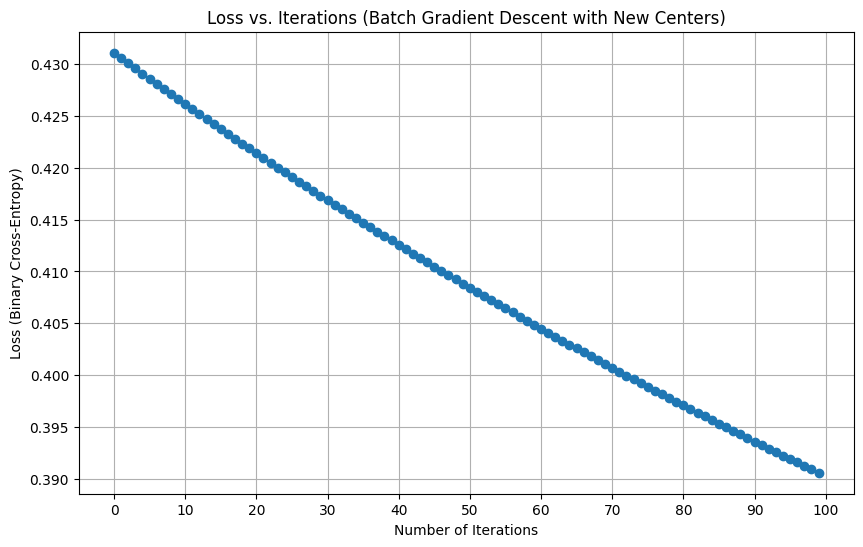

Final weights: [0.45645407 0.85713238 0.71248212]


In [42]:
# 3.10
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate synthetic data with new centers
np.random.seed(0)
centers = [[3, 0], [5, 1.5]]  # Updated centers
X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)

# Convert the target to binary (0 and 1)
y = (y == 1).astype(int)  # Assuming class 1 is the second class

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones to X for the intercept

# Initialize weights to random values between 0 and 1
weights = np.random.rand(X.shape[1])

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Number of iterations and learning rate
iterations = 100
learning_rate = 0.01

# List to store loss values
loss_values = []

# Batch Gradient Descent
for i in range(iterations):
    # Compute predictions
    z = np.dot(X, weights)
    predictions = sigmoid(z)

    # Compute the gradient
    gradient = np.dot(X.T, (predictions - y)) / y.size

    # Update weights
    weights -= learning_rate * gradient

    # Compute and store the cost
    cost = -np.mean(y * np.log(predictions + 1e-15) + (1 - y) * np.log(1 - predictions + 1e-15))
    loss_values.append(cost)

    # Print the cost every 10 iterations
    if i % 10 == 0:
        print(f"Iteration {i}, Cost: {cost:.4f}")

# Plotting the loss with respect to the number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), loss_values, marker='o')
plt.title('Loss vs. Iterations (Batch Gradient Descent with New Centers)')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss (Binary Cross-Entropy)')
plt.grid()
plt.xticks(range(0, iterations + 1, 10))
plt.show()

# Final weights
print("Final weights:", weights)
